In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
!pip install ase
import ase #package called Atomic Simulation Environment which allows us to construct crystals easily
from ase.spacegroup import crystal
from ase.visualize import view
from ase.visualize.plot import plot_atoms
from tqdm import tqdm
from ase.io import read, write

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.0/3.0 MB 54.2 MB/s eta 0:00:00


In [ ]:

# Truth value for toggling prints
keep_prints = True

# Here is an example of using it for a print
if keep_prints: print("Toggled prints are kept")

Toggled prints are kept


In [ ]:
# new crystal method - diamond
# Script to create crystal using ase and cif, as well as reformat the output lmp file so lammps can read it

#atoms = read('1541404.cif') crystal 1
#atoms = read('9011575.cif') #crystal 2
atoms = read('9011997.cif') #crystal 3
#print(atoms)

# Replicate the unit cell
atoms *= ((30,30,30))
atoms.center

view(atoms)

write("diamond_cifcell_test.lmp", atoms, format="lammps-data", specorder=['C'])

mass1 = 12.011 #C    -- edit these as needed
mass2=196.000 #Au

with open('diamond_cifcell_test.lmp', 'w') as f:
  '''reformats file so lammps can read it properly
    all notations that follow a '#' symbol are optional and are for clarity'''
  f.write("This is a title line so LAMMPS doesn't act weird \n")
  print(len(atoms), 'atoms', file=f)
  f.write('2 atom types \n') #change to match your crystal, keep plural even for singular type
  f.write('\n')
  f.write('-50.0 150.0 xlo xhi \n') #change to fit the dimensions you need
  f.write('-20.0 110.0 ylo yhi \n')
  f.write('-20.0 110.0 zlo zhi \n')
  f.write('\n')
  f.write('Masses \n')
  f.write('\n')
  print('1', mass1, '#C', file=f)
  print('2', mass2, '#Au \n', file=f)
  print('Atoms #atomic', atoms.cell, '\n', file=f)

  for i, atom in enumerate(atoms, start=1):
      atom_charge = atom.charge '''this can be changed if a specific charge is wanted,
                                also can be placed in the if loops below to specify charge to atom type'''
      if atom.number == 6:
        atom_type = 1
      #if atom.number == 79:  -- an example of how to adjust for more than one atom type
        #atom_type = 2
      x, y, z = atom.position
      f.write(f"{i} {atom_type} {x:.6f} {y:.6f} {z:.6f}\n")
      #f.write(f"{i} {atom_type} {atom_charge} {x:.6f} {y:.6f} {z:.6f} \n") #substitute this line instead of the above if atom charge is wanted

/usr/local/lib/python3.11/dist-packages/ase/spacegroup/spacegroup.py:481: UserWarning: scaled_positions 0 and 1 are equivalent
  warnings.warn(


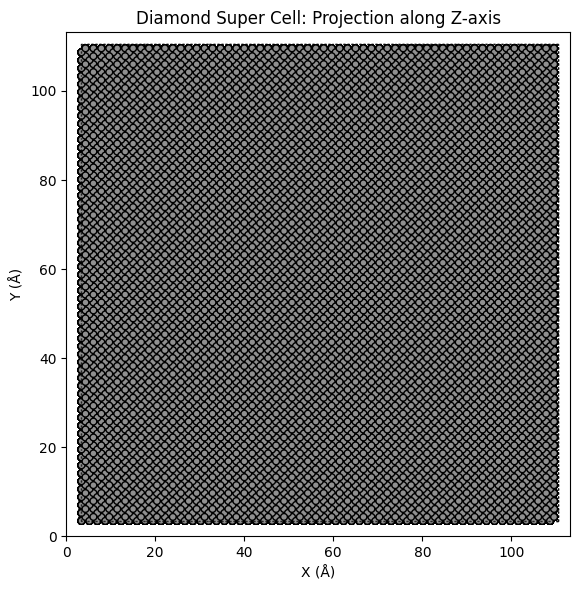

In [ ]:
#diamond unit cell and supercell

a = 3.567
diamond_cell = crystal(symbols= 'C2', basis= [(0,0,0),(.25,.25,.25)],
spacegroup = 227, cellpar = [a,a,a,90,90,90])

diamond_supercell = diamond_cell.repeat((30,30,30))
diamond_supercell.write('diamond_supersupercell.lmp', format='lammps-data')
with open('diamond_supersupercell.lmp', 'w') as f:
    f.write("ID Type x y z\n")
    for i, atom in enumerate(diamond_supercell, start=1):
        atom_type = atom.number  # or use a mapping from symbol if needed
        x, y, z = atom.position
        f.write(f"{i} {atom_type} {x:.6f} {y:.6f} {z:.6f}\n")

# 2D projection — you can use 'x', 'y', 'z' for different views
if keep_prints:
  fig, ax = plt.subplots(figsize=(8, 6))
  plot_atoms(diamond_supercell, ax, show_unit_cell=2)
  ax.set_xlabel("X (Å)")
  ax.set_ylabel("Y (Å)")
  plt.title("Diamond Super Cell: Projection along Z-axis")
  plt.tight_layout()
  plt.show()

In [ ]:

#quartz unit cell

a, c = 4.9137, 5.4047
quartz_cell = crystal(symbols= ['Si','Si', 'O','O','O','O'],
                       basis= [
                        (0.4697, 0.0, 0.0),     # Si
                        (0.5303, 0.0, 0.6667),  # Si
                        (0.4133, 0.2673, 0.7854),  # O
                        (0.5867, -0.2673, 0.4520), # O
                        (0.7327, 0.1460, 0.1199),  # O
                        (0.2673, -0.1460, 0.7854)],  # O
                       spacegroup = 152, cellpar = [a,a,c,90,90,120])

# 2D projection — you can use 'x', 'y', 'z' for different views
if keep_prints:

  fig, ax = plt.subplots(figsize=(4, 3))
  plot_atoms(quartz_cell, ax, rotation = '90y',show_unit_cell=2)

  ax.set_xlabel("Y (Å)")
  ax.set_ylabel("Z (Å)")
  plt.title("Quartz Unit Cell: Projection along X-axis")
  plt.tight_layout()
  plt.show()

  fig, ax = plt.subplots(figsize=(4, 3))
  plot_atoms(quartz_cell, ax, rotation='-90x', show_unit_cell=2)

  ax.set_xlabel("X (Å)")
  ax.set_ylabel("Z (Å)")
  plt.title("Quartz Unit Cell: Projection along Y-axis")
  plt.tight_layout()
  plt.show()

  fig, ax = plt.subplots(figsize=(4, 3))
  plot_atoms(quartz_cell, ax, show_unit_cell=2)

  ax.set_xlabel("X (Å)")
  ax.set_ylabel("Y (Å)")
  plt.title("Quartz Unit Cell: Projection along Z-axis")
  plt.tight_layout()
  plt.show()

/usr/local/lib/python3.11/dist-packages/ase/spacegroup/spacegroup.py:481: UserWarning: scaled_positions 3 and 5 are equivalent
  warnings.warn(


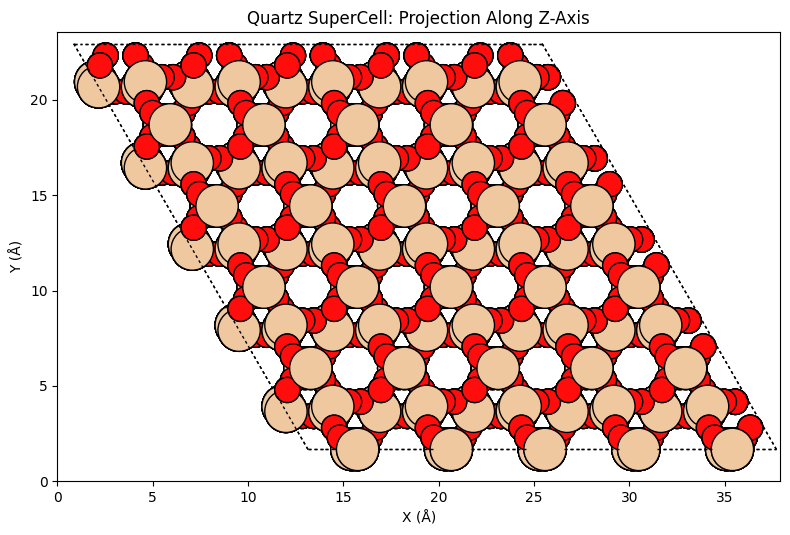

In [ ]:
#quartz supercell
quartz_supercell = quartz_cell.repeat((5,5,5))
quartz_supercell.write('quartz_supercell2.lmp', format='lammps-data')
with open('quartz_supercell.lmp', 'w') as f:
    f.write("ID Type x y z\n")
    for i, atom in enumerate(quartz_supercell, start=1):
        atom_type = atom.number  # or use a mapping from symbol if needed
        x, y, z = atom.position
        f.write(f"{i} {atom_type} {x:.6f} {y:.6f} {z:.6f}\n")
if keep_prints:
  fig, ax = plt.subplots(figsize=(8, 6))
  plot_atoms(quartz_supercell, ax, show_unit_cell=1)

  ax.set_xlabel("X (Å)")
  ax.set_ylabel("Y (Å)")
  plt.title("Quartz SuperCell: Projection Along Z-Axis")
  plt.tight_layout()
  plt.show()

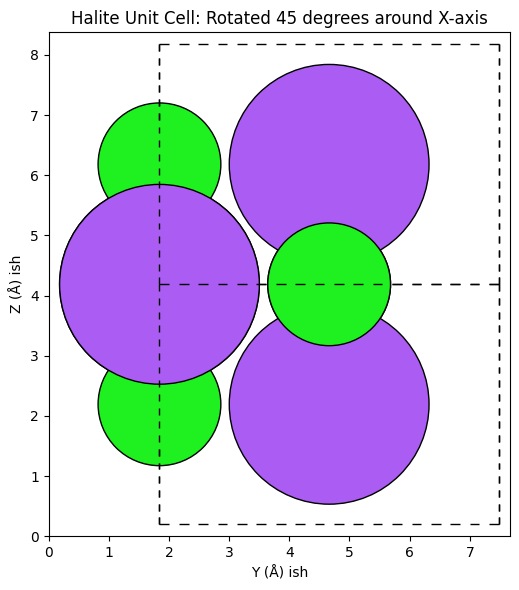

In [ ]:
#halite unit cell

a = 5.640
halite_cell = crystal(symbols= 'NaClNaCl',
                       basis= [
                        (0,0,0), #Na
                        (0.5,0.5,0.5), #Cl
                        (0.5,0,0), #Na
                        (0,0.5,0.5)], #Cl
                       spacegroup = 225, cellpar = [a,a,a,90,90,90])
if keep_prints:
  fig, ax = plt.subplots(figsize=(6, 6))
  plot_atoms(halite_cell, ax, rotation='45x',  show_unit_cell=2)

  ax.set_xlabel("Y (Å) ish")
  ax.set_ylabel("Z (Å) ish")
  plt.title("Halite Unit Cell: Rotated 45 degrees around X-axis")
  plt.tight_layout()
  plt.show()

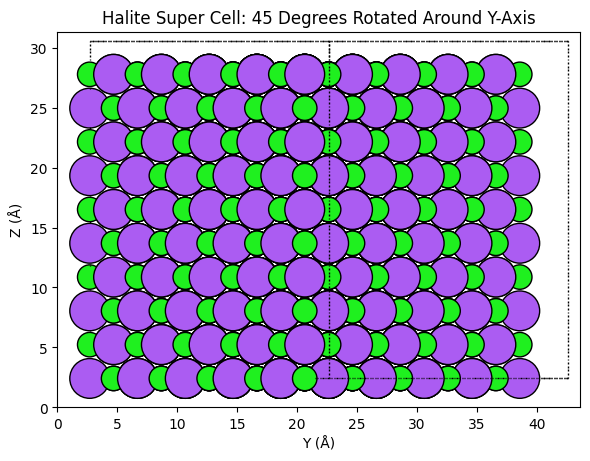

In [ ]:
#halite supercell

halite_supercell = halite_cell.repeat((5,5,5,))
halite_supercell.write('halite_supercell.lmp', format='lammps-data')
with open('halite_supercell.lmp', 'w') as f:
    f.write("ID Type x y z\n")
    for i, atom in enumerate(halite_supercell, start=1):
        atom_type = atom.number  # or use a mapping from symbol if needed
        x, y, z = atom.position
        f.write(f"{i} {atom_type} {x:.6f} {y:.6f} {z:.6f}\n")

if keep_prints:
  fig, ax = plt.subplots(figsize=(6, 6))
  plot_atoms(halite_supercell, ax, rotation='45y', show_unit_cell=2)

  ax.set_xlabel("Y (Å)")
  ax.set_ylabel("Z (Å)")
  plt.title("Halite Super Cell: 45 Degrees Rotated Around Y-Axis")
  plt.tight_layout()
  plt.show()

In [ ]:
#olivine unit cell
a, b, c = 4.75, 5.10, 5.98  # Reduced cell (half of conventional b-axis)

olivine_cell = crystal(
    symbols=[
        'Mg', 'Mg', 'Mg', 'Mg',  # 4 Mg
        'Si', 'Si',              # 2 Si
        'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O'  # 8 O
    ],
    basis=[
        (0.275, 0.250, 0.990),  # Mg1
        (0.800, 0.250, 0.510),  # Mg2
        (0.275, 0.750, 0.990),  # Mg3 (symmetry mate)
        (0.800, 0.750, 0.510),  # Mg4

        (0.095, 0.250, 0.425),  # Si1
        (0.595, 0.250, 0.070),  # Si2

        (0.071, 0.991, 0.765),  # O1
        (0.224, 0.763, 0.236),  # O2
        (0.386, 0.508, 0.398),  # O3
        (0.466, 0.742, 0.402),  # O4

        (0.071, 0.491, 0.765),  # O5 (symmetry)
        (0.224, 0.263, 0.236),  # O6
        (0.386, 0.008, 0.398),  # O7
        (0.466, 0.242, 0.402),  # O8
    ],
    spacegroup=58,  # Pbn21: lower symmetry, allows 2 formula units
    cellpar=[a, b, c, 90, 90, 90])
if keep_prints:
  fig, ax = plt.subplots(figsize=(6, 6))
  plot_atoms(olivine_cell, ax, rotation='90y', show_unit_cell=2)

  ax.set_xlabel("Y (Å)")
  ax.set_ylabel("Z (Å)")
  plt.title("Olivine Unit Cell: Projected along the X-Axis")
  plt.tight_layout()
  plt.show()

In [ ]:
#olivine supercell
olivine_supercell = olivine_cell.repeat((5,5,5))

if keep_prints:
  fig, ax = plt.subplots(figsize=(6, 6))
  plot_atoms(olivine_supercell, ax, rotation='90y', show_unit_cell=2)

  ax.set_xlabel("Y (Å)")
  ax.set_ylabel("Z (Å)")
  plt.title("Olivine Super Cell: Projected along the X-Axis")
  plt.tight_layout()
  plt.show()

olivine_supercell.write('olivine_supercell2.lmp', format='lammps-data')
with open('olivine_supercell2.lmp', 'w') as f:
    f.write("ID Type x y z\n")
    for i, atom in enumerate(olivine_supercell, start=1):
        atom_type = atom.number  # or use a mapping from symbol if needed
        x, y, z = atom.position
        f.write(f"{i} {atom_type} {x:.6f} {y:.6f} {z:.6f}\n")

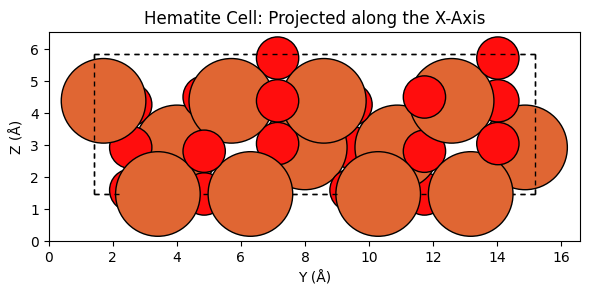

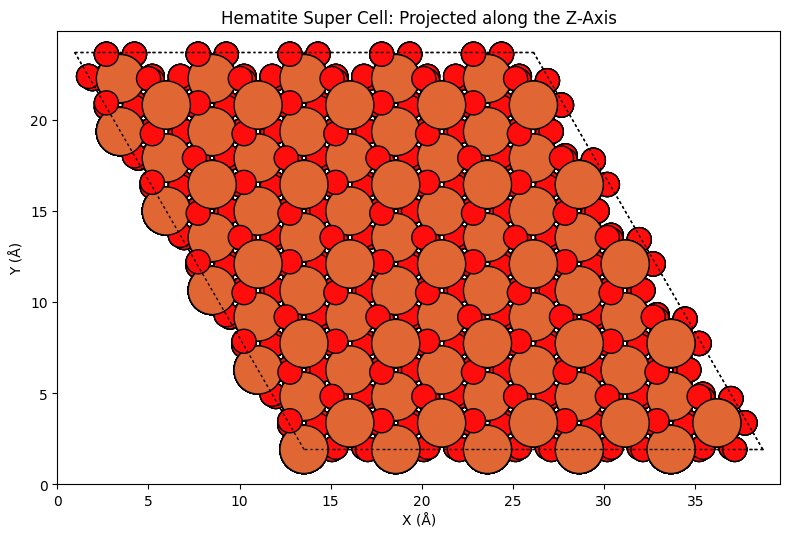

In [ ]:
#hematite (Fe2O3) unit cell

a = 5.035
c = 13.748

# Hematite structure: Fe at 12c, O at 18e positions
# Fractional coordinates from experimental data (Wyckoff positions)
hematite_cell = crystal(
    symbols=['Fe', 'O'],
    basis=[
        (0.0, 0.0, 0.355),  # Fe (12c) — ASE will expand using symmetry
        (0.306, 0.0, 0.25)  # O  (18e)
    ],
    spacegroup=167,
    cellpar=[a, a, c, 90, 90, 120])

if keep_prints:
  fig, ax = plt.subplots(figsize=(6, 6))
  plot_atoms(hematite_cell, ax, rotation='90y', show_unit_cell=2)

  ax.set_xlabel("Y (Å)")
  ax.set_ylabel("Z (Å)")
  plt.title("Hematite Cell: Projected along the X-Axis")
  plt.tight_layout()
  plt.show()

#hematite supercell

hematite_supercell = hematite_cell.repeat((5,5,5))
if keep_prints:
  fig, ax = plt.subplots(figsize = (8,6))
  plot_atoms(hematite_supercell, ax, show_unit_cell=2)
  ax.set_xlabel("X (Å)")
  ax.set_ylabel("Y (Å)")
  plt.title("Hematite Super Cell: Projected along the Z-Axis")
  plt.tight_layout()
  plt.show()

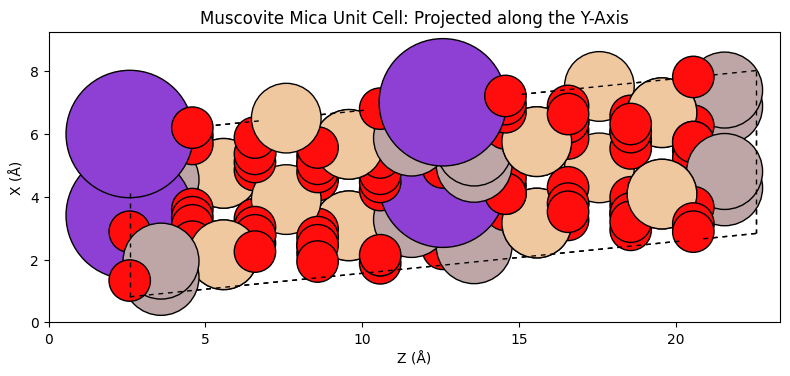

In [ ]:
#muscovite mica unit cell
a, b, c = 5.19, 9.01, 20.06
beta = 95.78

muscovite_cell = crystal(symbols=[
        'K',      # Potassium
        'Al', 'Al',  # Two aluminums
        'Si', 'Si', 'Si',  # Three silicons
        'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O',  # 10 Oxygens
        'O', 'O'   # Representing 2 OH
    ],
    basis=[
        (0.0, 0.0, 0.0),        # K
        (0.2, 0.15, 0.45),      # Al1
        (0.4, 0.35, 0.55),      # Al2
        (0.3, 0.25, 0.65),      # Si1
        (0.5, 0.45, 0.75),      # Si2
        (0.7, 0.15, 0.85),      # Si3
        (0.1, 0.1, 0.6),        # O1–O10 (positions are approximate)
        (0.2, 0.2, 0.7),
        (0.3, 0.3, 0.8),
        (0.4, 0.4, 0.9),
        (0.5, 0.5, 0.1),
        (0.6, 0.6, 0.2),
        (0.7, 0.7, 0.3),
        (0.8, 0.8, 0.4),
        (0.9, 0.9, 0.5),
        (0.05, 0.05, 0.6),
        (0.15, 0.15, 0.7),      # OH1
        (0.25, 0.25, 0.8)       # OH2
    ],
    spacegroup=15,  # C2/c
    cellpar=[a, b, c, 90, beta, 90])

if keep_prints:
  fig, ax = plt.subplots(figsize = (8,6))
  plot_atoms(muscovite_cell, ax, rotation = '-90x,-90z', show_unit_cell=2)
  ax.set_xlabel("Z (Å)")
  ax.set_ylabel("X (Å)")
  plt.title("Muscovite Mica Unit Cell: Projected along the Y-Axis")
  plt.tight_layout()
  plt.show()

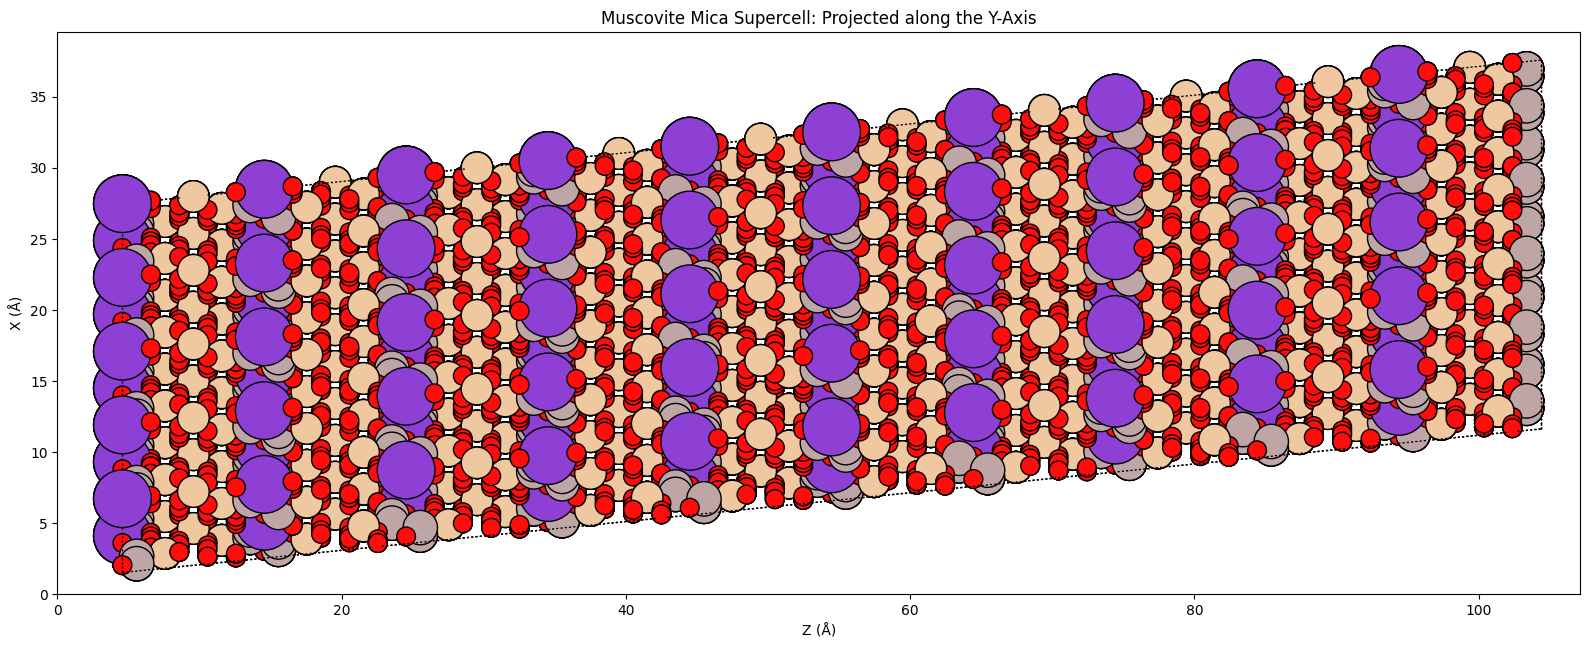

In [ ]:
#muscovite mica supercell

muscovite_supercell = muscovite_cell.repeat((5,5,5,))

if keep_prints:
  fig, ax = plt.subplots(figsize = (16,16))
  plot_atoms(muscovite_supercell, ax, rotation = '-90x,-90z', show_unit_cell=2)
  ax.set_xlabel("Z (Å)")
  ax.set_ylabel("X (Å)")
  plt.title("Muscovite Mica Supercell: Projected along the Y-Axis")
  plt.tight_layout()
  plt.show()

In [ ]:
#gold unit cell and supercell
a = 4.078
gold_cell = crystal(symbols = "Au", basis = [(0,0,0)], spacegroup = 225, cellpar = [a,a,a, 90,90,90])
gold_supercell = gold_cell.repeat((5,5,5))

if keep_prints:
  figfig, ax = plt.subplots(figsize = (8,6))
  plot_atoms(gold_supercell, ax, show_unit_cell=2)
  ax.set_xlabel("X (Å)")
  ax.set_ylabel("Y (Å)")
  plt.title("Gold Supercell: Projected along the Z-Axis")
  plt.tight_layout()
  plt.show()

gold_supercell.write('gold_supercell.lmp', format='lammps-data')
with open('gold_supercell2.lmp', 'w') as f:
    f.write("ID Type x y z\n")
    for i, atom in enumerate(gold_supercell, start=1):
        atom_type = atom.number  # or use a mapping from symbol if needed
        x, y, z = atom.position
        f.write(f"{i} {atom_type} {x:.6f} {y:.6f} {z:.6f}\n")